# Импорты и загрузка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

!pip install pymorphy2
from pymorphy2 import MorphAnalyzer

from wordcloud import WordCloud

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [46]:
path_db = "drive/MyDrive/Career and Education/SBER/DS • ML/Relevance classifier/db.csv"
db = pd.read_csv(path_db)
db

,id,source,url,title,content,created_at
0,119548,Ru24,https://ru24.net/moscow/368312528/,Восстановлена статуя Христа на кладбище в Лефо...,Восстановлена статуя Христа на кладбище в Лефо...,2023-12-23 23:44:00+00
1,119549,Ru24,https://ru24.net/moscow/368312171/,"Ловчев раскритиковал Федуна за деньги, потраче...",Вместо жены мог бы подумать о болельщиках «Спа...,2023-12-23 23:44:00+00
2,119550,Ru24,https://ru24.net/moscow/368312529/,Сотрудники полиции задержали подозреваемых в м...,Сотрудники полиции задержали подозреваемых в м...,2023-12-23 23:29:00+00
3,119551,Ru24,https://ru24.net/moscow/368312530/,В Измайлове появится новый физкультурно-оздоро...,В Измайлове появится новый физкультурно-оздоро...,2023-12-23 23:29:00+00
4,119552,1prime,https://1prime.ru/macroeconomics/20231224/8426...,Министр обороны Италии призвал к политическому...,"МОСКВА, 24 дек — ПРАЙМ. После почти двух лет к...",2023-12-24 00:25:43+00
...,...,...,...,...,...,...
167383,119542,Tass,https://tass.ru/obschestvo/19617933,В Саратовской области за 3 года ликвидировали ...,Свыше 30 несанкционированных свалок ликвидиров...,2023-12-23 22:34:59+00
167384,119543,Tass,https://tass.ru/nacionalnye-proekty/19616747,Голикова и Мурашко открыли две детские поликли...,"ТАСС, 23 декабря. Две новые детские поликлиник...",2023-12-23 13:40:32+00
167385,119544,Ru24,https://ru24.net/moscow/368312493/,СК: мужчина зарезал девушку и ранил сам себя в...,Мужчина во время ссоры зарезал девушку в кварт...,2023-12-24 00:12:00+00
167386,119545,Ru24,https://ru24.net/moscow/368312473/,Красное море проблем: Россия и Китай опять обо...,| 23 декабря 2023г. – VRUBCOVSKE.RU. Кризис в...,2023-12-24 00:02:00+00


In [14]:
path_result = "drive/MyDrive/Career and Education/SBER/DS • ML/Relevance classifier/result.csv"
result = pd.read_csv(path_result)
result

,id,content,keywords
0,119565,«Orlen SA подал иск в арбитражный суд на Ventu...,"нефть, спг"
1,119582,У пострадавшей москвички диагностировали сотря...,level
2,119584,Авиакомпания iFly Airlines открыла продажу суб...,внуково
3,119588,Первый с 2020 года регулярный пассажирский рей...,"аэрофлот, шереметьево"
4,119595,Пассажиры в Домодедово тоже до сих пор ожидают...,домодедово
...,...,...,...
33298,119493,Власти Петербурга надеются на возрождение авто...,автоваз
33299,119501,"Беспилотный летательный аппарат (БПЛА), в субб...",нефть
33300,119526,"Мужчина, вооруженный пистолетом, захвативший в...",автобан
33301,119529,"Неизвестный, вооруженный пистолетом, захватил ...",автобан


In [15]:
result = result[result['content'].apply(lambda x: isinstance(x, str))]
result

,id,content,keywords
0,119565,«Orlen SA подал иск в арбитражный суд на Ventu...,"нефть, спг"
1,119582,У пострадавшей москвички диагностировали сотря...,level
2,119584,Авиакомпания iFly Airlines открыла продажу суб...,внуково
3,119588,Первый с 2020 года регулярный пассажирский рей...,"аэрофлот, шереметьево"
4,119595,Пассажиры в Домодедово тоже до сих пор ожидают...,домодедово
...,...,...,...
33298,119493,Власти Петербурга надеются на возрождение авто...,автоваз
33299,119501,"Беспилотный летательный аппарат (БПЛА), в субб...",нефть
33300,119526,"Мужчина, вооруженный пистолетом, захвативший в...",автобан
33301,119529,"Неизвестный, вооруженный пистолетом, захватил ...",автобан


In [47]:
ids_in_result = set(result['id'])
db['relevance'] = db['id'].isin(ids_in_result).astype(int)
db.head(15)

,id,source,url,title,content,created_at,relevance
0,119548,Ru24,https://ru24.net/moscow/368312528/,Восстановлена статуя Христа на кладбище в Лефо...,Восстановлена статуя Христа на кладбище в Лефо...,2023-12-23 23:44:00+00,0
1,119549,Ru24,https://ru24.net/moscow/368312171/,"Ловчев раскритиковал Федуна за деньги, потраче...",Вместо жены мог бы подумать о болельщиках «Спа...,2023-12-23 23:44:00+00,0
2,119550,Ru24,https://ru24.net/moscow/368312529/,Сотрудники полиции задержали подозреваемых в м...,Сотрудники полиции задержали подозреваемых в м...,2023-12-23 23:29:00+00,0
3,119551,Ru24,https://ru24.net/moscow/368312530/,В Измайлове появится новый физкультурно-оздоро...,В Измайлове появится новый физкультурно-оздоро...,2023-12-23 23:29:00+00,0
4,119552,1prime,https://1prime.ru/macroeconomics/20231224/8426...,Министр обороны Италии призвал к политическому...,"МОСКВА, 24 дек — ПРАЙМ. После почти двух лет к...",2023-12-24 00:25:43+00,0
5,119556,Ru24,https://ru24.net/moscow/368313380/,В ФСБ раскрыли подробности госизмены экс-совет...,По истечении более года с момента оглашение пр...,2023-12-24 00:11:00+00,0
6,119557,Ria,https://radiosputnik.ru/20231223/1917694984.html,И приз за лучший поцелуй присуждается...,"Начинаем с темы ""двойников Путина"", взволновав...",2023-12-23 17:33:00+00,0
7,119558,Ru24,https://ru24.net/moscow/368313895/,Delfi: На латвийской почте начали вскрывать и ...,В почтовых отделениях Латвии начали вскрывать ...,2023-12-24 01:14:00+00,0
8,119559,Ru24,https://ru24.net/moscow/368313708/,"Форум ""ОстроVа"" признали лучшим на Всероссийск...",Сахалинская область впервые занимает первое ме...,2023-12-24 01:11:00+00,0
9,119560,Ru24,https://ru24.net/moscow/368313896/,«Сила природы»: обряды и заговоры для бездетны...,"История магических ритуалов, связанных с плодо...",2023-12-24 01:00:00+00,0


In [48]:
dbr = db[['title', 'content', 'relevance']]
dbr

,title,content,relevance
0,Восстановлена статуя Христа на кладбище в Лефо...,Восстановлена статуя Христа на кладбище в Лефо...,0
1,"Ловчев раскритиковал Федуна за деньги, потраче...",Вместо жены мог бы подумать о болельщиках «Спа...,0
2,Сотрудники полиции задержали подозреваемых в м...,Сотрудники полиции задержали подозреваемых в м...,0
3,В Измайлове появится новый физкультурно-оздоро...,В Измайлове появится новый физкультурно-оздоро...,0
4,Министр обороны Италии призвал к политическому...,"МОСКВА, 24 дек — ПРАЙМ. После почти двух лет к...",0
...,...,...,...
167383,В Саратовской области за 3 года ликвидировали ...,Свыше 30 несанкционированных свалок ликвидиров...,0
167384,Голикова и Мурашко открыли две детские поликли...,"ТАСС, 23 декабря. Две новые детские поликлиник...",0
167385,СК: мужчина зарезал девушку и ранил сам себя в...,Мужчина во время ссоры зарезал девушку в кварт...,0
167386,Красное море проблем: Россия и Китай опять обо...,| 23 декабря 2023г. – VRUBCOVSKE.RU. Кризис в...,0


In [49]:
dbr = dbr[dbr['title'].apply(lambda x: isinstance(x, str)) & dbr['content'].apply(lambda x: isinstance(x, str))]
dbr

,title,content,relevance
0,Восстановлена статуя Христа на кладбище в Лефо...,Восстановлена статуя Христа на кладбище в Лефо...,0
1,"Ловчев раскритиковал Федуна за деньги, потраче...",Вместо жены мог бы подумать о болельщиках «Спа...,0
2,Сотрудники полиции задержали подозреваемых в м...,Сотрудники полиции задержали подозреваемых в м...,0
3,В Измайлове появится новый физкультурно-оздоро...,В Измайлове появится новый физкультурно-оздоро...,0
4,Министр обороны Италии призвал к политическому...,"МОСКВА, 24 дек — ПРАЙМ. После почти двух лет к...",0
...,...,...,...
167383,В Саратовской области за 3 года ликвидировали ...,Свыше 30 несанкционированных свалок ликвидиров...,0
167384,Голикова и Мурашко открыли две детские поликли...,"ТАСС, 23 декабря. Две новые детские поликлиник...",0
167385,СК: мужчина зарезал девушку и ранил сам себя в...,Мужчина во время ссоры зарезал девушку в кварт...,0
167386,Красное море проблем: Россия и Китай опять обо...,| 23 декабря 2023г. – VRUBCOVSKE.RU. Кризис в...,0


In [50]:
print(dbr['relevance'].count())
print(dbr['relevance'].value_counts())
dbr['relevance'].value_counts('0')

167371
0    134068
1     33303
Name: relevance, dtype: int64


0    0.801023
1    0.198977
Name: relevance, dtype: float64

# Предобработка

In [19]:
dbr['content'][0]

'Восстановлена статуя Христа на кладбище в Лефортове. Информационный центр столичного правительства организовал пресс-тур по объектам, которые были признаны лауреатами конкурса "Московская реставрация". Один из таких объектов - доходный дом Натальи Тюляевой на улице Забелина. В прошлом здесь были просторные квартиры, однако теперь здание будет использовано Фондом Николая Расторгуева. В районе Лефортово на Введенском кладбище завершилась реставрация усыпальницы семейства Кноп. Руководитель проекта реставрационной мастерской, Илья Стадник, рассказал о трудностях, с которыми столкнулась команда в процессе восстановления. Особенно сложной задачей было восстановить двухметровую бронзовую статую Христа, созданную итальянским скульптором Рафаэлло Романелли и установленную перед усыпальницей. Также, журналисты посетили отреставрированный детский приют Ансамбля Рогожской старообрядческой общины XIX-начала ХХ века "Козина палата". Этот объект также стал лауреатом конкурса "Московская...'

In [3]:
stop_words = stopwords.words('russian')
print(stop_words)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [21]:
test_list = word_tokenize(dbr['content'][0])
print(test_list)

['Восстановлена', 'статуя', 'Христа', 'на', 'кладбище', 'в', 'Лефортове', '.', 'Информационный', 'центр', 'столичного', 'правительства', 'организовал', 'пресс-тур', 'по', 'объектам', ',', 'которые', 'были', 'признаны', 'лауреатами', 'конкурса', '``', 'Московская', 'реставрация', "''", '.', 'Один', 'из', 'таких', 'объектов', '-', 'доходный', 'дом', 'Натальи', 'Тюляевой', 'на', 'улице', 'Забелина', '.', 'В', 'прошлом', 'здесь', 'были', 'просторные', 'квартиры', ',', 'однако', 'теперь', 'здание', 'будет', 'использовано', 'Фондом', 'Николая', 'Расторгуева', '.', 'В', 'районе', 'Лефортово', 'на', 'Введенском', 'кладбище', 'завершилась', 'реставрация', 'усыпальницы', 'семейства', 'Кноп', '.', 'Руководитель', 'проекта', 'реставрационной', 'мастерской', ',', 'Илья', 'Стадник', ',', 'рассказал', 'о', 'трудностях', ',', 'с', 'которыми', 'столкнулась', 'команда', 'в', 'процессе', 'восстановления', '.', 'Особенно', 'сложной', 'задачей', 'было', 'восстановить', 'двухметровую', 'бронзовую', 'статую'

In [22]:
test_list = [word.lower() for word in test_list]
print(test_list)

['восстановлена', 'статуя', 'христа', 'на', 'кладбище', 'в', 'лефортове', '.', 'информационный', 'центр', 'столичного', 'правительства', 'организовал', 'пресс-тур', 'по', 'объектам', ',', 'которые', 'были', 'признаны', 'лауреатами', 'конкурса', '``', 'московская', 'реставрация', "''", '.', 'один', 'из', 'таких', 'объектов', '-', 'доходный', 'дом', 'натальи', 'тюляевой', 'на', 'улице', 'забелина', '.', 'в', 'прошлом', 'здесь', 'были', 'просторные', 'квартиры', ',', 'однако', 'теперь', 'здание', 'будет', 'использовано', 'фондом', 'николая', 'расторгуева', '.', 'в', 'районе', 'лефортово', 'на', 'введенском', 'кладбище', 'завершилась', 'реставрация', 'усыпальницы', 'семейства', 'кноп', '.', 'руководитель', 'проекта', 'реставрационной', 'мастерской', ',', 'илья', 'стадник', ',', 'рассказал', 'о', 'трудностях', ',', 'с', 'которыми', 'столкнулась', 'команда', 'в', 'процессе', 'восстановления', '.', 'особенно', 'сложной', 'задачей', 'было', 'восстановить', 'двухметровую', 'бронзовую', 'статую'

In [23]:
test_list = [word for word in test_list if word not in stop_words]
print(test_list)

['восстановлена', 'статуя', 'христа', 'кладбище', 'лефортове', '.', 'информационный', 'центр', 'столичного', 'правительства', 'организовал', 'пресс-тур', 'объектам', ',', 'которые', 'признаны', 'лауреатами', 'конкурса', '``', 'московская', 'реставрация', "''", '.', 'таких', 'объектов', '-', 'доходный', 'дом', 'натальи', 'тюляевой', 'улице', 'забелина', '.', 'прошлом', 'просторные', 'квартиры', ',', 'однако', 'здание', 'использовано', 'фондом', 'николая', 'расторгуева', '.', 'районе', 'лефортово', 'введенском', 'кладбище', 'завершилась', 'реставрация', 'усыпальницы', 'семейства', 'кноп', '.', 'руководитель', 'проекта', 'реставрационной', 'мастерской', ',', 'илья', 'стадник', ',', 'рассказал', 'трудностях', ',', 'которыми', 'столкнулась', 'команда', 'процессе', 'восстановления', '.', 'особенно', 'сложной', 'задачей', 'восстановить', 'двухметровую', 'бронзовую', 'статую', 'христа', ',', 'созданную', 'итальянским', 'скульптором', 'рафаэлло', 'романелли', 'установленную', 'усыпальницей', '.

In [24]:
stop_chars = [',', '.', '``', '\'', '"', '-', '–', '—', '•', ';', ':', '@', '#',
              '^', '...', '\'\'']
test_list = [char for char in test_list if char not in stop_chars]
print(test_list)

['восстановлена', 'статуя', 'христа', 'кладбище', 'лефортове', 'информационный', 'центр', 'столичного', 'правительства', 'организовал', 'пресс-тур', 'объектам', 'которые', 'признаны', 'лауреатами', 'конкурса', 'московская', 'реставрация', 'таких', 'объектов', 'доходный', 'дом', 'натальи', 'тюляевой', 'улице', 'забелина', 'прошлом', 'просторные', 'квартиры', 'однако', 'здание', 'использовано', 'фондом', 'николая', 'расторгуева', 'районе', 'лефортово', 'введенском', 'кладбище', 'завершилась', 'реставрация', 'усыпальницы', 'семейства', 'кноп', 'руководитель', 'проекта', 'реставрационной', 'мастерской', 'илья', 'стадник', 'рассказал', 'трудностях', 'которыми', 'столкнулась', 'команда', 'процессе', 'восстановления', 'особенно', 'сложной', 'задачей', 'восстановить', 'двухметровую', 'бронзовую', 'статую', 'христа', 'созданную', 'итальянским', 'скульптором', 'рафаэлло', 'романелли', 'установленную', 'усыпальницей', 'также', 'журналисты', 'посетили', 'отреставрированный', 'детский', 'приют', 'а

In [25]:
morph = MorphAnalyzer()
for word in test_list:
  parsed = morph.parse(word)[0]
  test_list[test_list.index(word)] = parsed.normal_form

print(test_list)

['восстановить', 'статуя', 'христос', 'кладбище', 'лефортово', 'информационный', 'центр', 'столичный', 'правительство', 'организовать', 'пресс-тур', 'объект', 'который', 'признать', 'лауреат', 'конкурс', 'московский', 'реставрация', 'такой', 'объект', 'доходный', 'дом', 'наталья', 'тюляева', 'улица', 'забелин', 'прошлый', 'просторный', 'квартира', 'однако', 'здание', 'использовать', 'фонд', 'николай', 'расторгуев', 'район', 'лефортово', 'введенский', 'кладбище', 'завершиться', 'реставрация', 'усыпальница', 'семейство', 'кноп', 'руководитель', 'проект', 'реставрационный', 'мастерская', 'илья', 'стадникнуть', 'рассказать', 'трудность', 'который', 'столкнуться', 'команда', 'процесс', 'восстановление', 'особенно', 'сложный', 'задача', 'восстановить', 'двухметровый', 'бронзовый', 'статуя', 'христос', 'создать', 'итальянский', 'скульптор', 'рафаэлло', 'романелли', 'установленный', 'усыпальница', 'также', 'журналист', 'посетить', 'отреставрировать', 'детский', 'приют', 'ансамбль', 'рогожский'

**Код для получения облака слов**

---

*   str_corpus
> преобразование корпуса к строке

*   get_wordCloud
> генерация облака слов

In [2]:
def str_corpus(corpus):
  str_corpus = ''
  for word in corpus:
      str_corpus += ' ' + word
  str_corpus = str_corpus.strip()
  return str_corpus

def get_wordCloud(corpus):
  wordCloud = WordCloud(background_color='white',
                            stopwords=stop_words,
                            width=3000,
                            height=2500,
                            max_words=200,
                            random_state=42
                        ).generate(str_corpus(corpus))
  return wordCloud

(-0.5, 2999.5, 2499.5, -0.5)

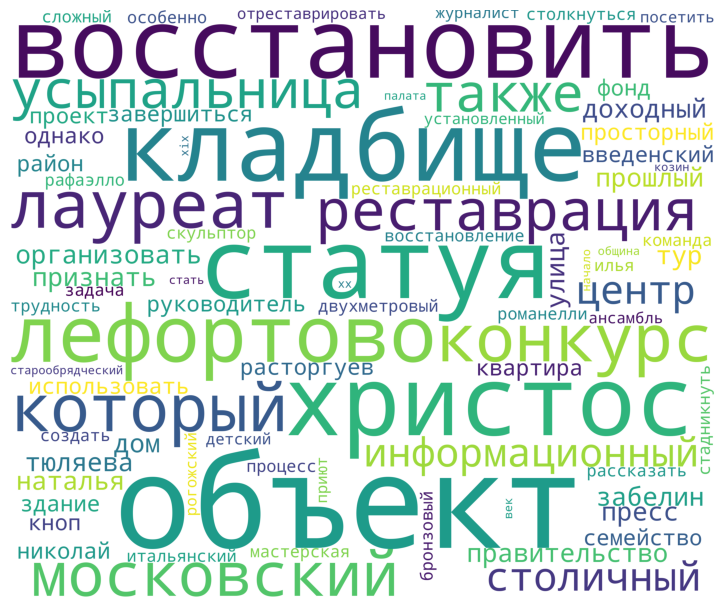

In [32]:
procWordCloud = get_wordCloud(test_list)
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')

In [4]:
stop_words += ['также']
print(stop_words)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [34]:
test_list = [word for word in test_list if word not in stop_words]
print(test_list)

['восстановить', 'статуя', 'христос', 'кладбище', 'лефортово', 'информационный', 'центр', 'столичный', 'правительство', 'организовать', 'пресс-тур', 'объект', 'который', 'признать', 'лауреат', 'конкурс', 'московский', 'реставрация', 'объект', 'доходный', 'дом', 'наталья', 'тюляева', 'улица', 'забелин', 'прошлый', 'просторный', 'квартира', 'однако', 'здание', 'использовать', 'фонд', 'николай', 'расторгуев', 'район', 'лефортово', 'введенский', 'кладбище', 'завершиться', 'реставрация', 'усыпальница', 'семейство', 'кноп', 'руководитель', 'проект', 'реставрационный', 'мастерская', 'илья', 'стадникнуть', 'рассказать', 'трудность', 'который', 'столкнуться', 'команда', 'процесс', 'восстановление', 'особенно', 'сложный', 'задача', 'восстановить', 'двухметровый', 'бронзовый', 'статуя', 'христос', 'создать', 'итальянский', 'скульптор', 'рафаэлло', 'романелли', 'установленный', 'усыпальница', 'журналист', 'посетить', 'отреставрировать', 'детский', 'приют', 'ансамбль', 'рогожский', 'старообрядчески

(-0.5, 2999.5, 2499.5, -0.5)

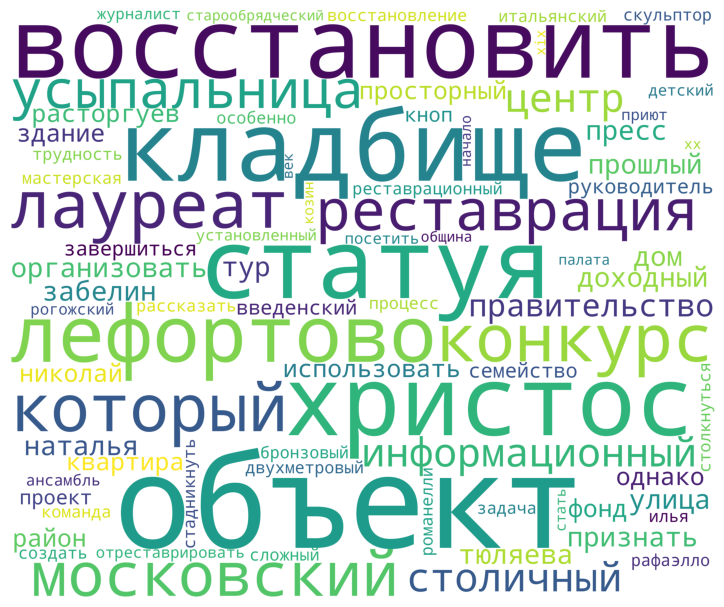

In [35]:
procWordCloud = get_wordCloud(test_list)
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')

# Сохранение

In [51]:
dbp = dbr
dbp

,title,content,relevance
0,Восстановлена статуя Христа на кладбище в Лефо...,Восстановлена статуя Христа на кладбище в Лефо...,0
1,"Ловчев раскритиковал Федуна за деньги, потраче...",Вместо жены мог бы подумать о болельщиках «Спа...,0
2,Сотрудники полиции задержали подозреваемых в м...,Сотрудники полиции задержали подозреваемых в м...,0
3,В Измайлове появится новый физкультурно-оздоро...,В Измайлове появится новый физкультурно-оздоро...,0
4,Министр обороны Италии призвал к политическому...,"МОСКВА, 24 дек — ПРАЙМ. После почти двух лет к...",0
...,...,...,...
167383,В Саратовской области за 3 года ликвидировали ...,Свыше 30 несанкционированных свалок ликвидиров...,0
167384,Голикова и Мурашко открыли две детские поликли...,"ТАСС, 23 декабря. Две новые детские поликлиник...",0
167385,СК: мужчина зарезал девушку и ранил сам себя в...,Мужчина во время ссоры зарезал девушку в кварт...,0
167386,Красное море проблем: Россия и Китай опять обо...,| 23 декабря 2023г. – VRUBCOVSKE.RU. Кризис в...,0


**Код предобработки значений датафрейма**

---

> **preproc**
>
> • токенизация\
> • приведение к нижнему регистру\
> • удаление стоп-слов\
> • удаление стоп-символов\
> • лемматизация\
> • приведение к формату строки

In [ ]:
def preproc(x):
  x = word_tokenize(x)
  x = [word.lower() for word in x]
  x = [word for word in x if word not in stop_words]
  x = [char for char in x if char not in stop_chars]
  for word in x:
    parsed = morph.parse(word)[0]
    x[x.index(word)] = parsed.normal_form
  x = ' '.join(x)
  return x

In [52]:
dbp['title'] = dbp['title'].apply(preproc)
dbp['content'] = dbp['content'].apply(preproc)
dbp

<ipython-input-52-c97f5266f3b9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbp['title'] = dbp['title'].apply(preproc)
<ipython-input-52-c97f5266f3b9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbp['content'] = dbp['content'].apply(preproc)


,title,content,relevance
0,восстановить статуя христос кладбище лефортово,восстановить статуя христос кладбище лефортово...,0
1,ловчев раскритиковать федун деньга потратить з...,вместо жена мочь подумать болельщик « спартак ...,0
2,сотрудник полиция задержать подозревать мошенн...,сотрудник полиция задержать подозревать мошенн...,0
3,измайлов появиться новый физкультурно-оздорови...,измайлов появиться новый физкультурно-оздорови...,0
4,министр оборона италия призвать политический р...,москва 24 дек прайма два год конфликт украина ...,0
...,...,...,...
167383,саратовский область 3 год ликвидировать свыше ...,свыше 30 несанкционированный свалка ликвидиров...,0
167384,голиков мурашко открыть два детский поликлиник...,тасс 23 декабрь два новый детский поликлиника ...,0
167385,ск мужчина зарезать девушка ранить центр москва,мужчина время ссора зарезать девушка квартира ...,0
167386,красный море проблема россия китай обойти сша,| 23 декабрь 2023г vrubcovske.ru кризис красны...,0


In [56]:
path_dbp = "drive/MyDrive/Career and Education/SBER/DS • ML/Relevance classifier/dbp.csv"
dbp.to_csv(path_dbp, columns=['title', 'content', 'relevance'], index=False, encoding='utf-8', quoting=csv.QUOTE_ALL)

In [5]:
path_dbp = "drive/MyDrive/Career and Education/SBER/DS • ML/Relevance classifier/dbp.csv"
dbp = pd.read_csv(path_dbp)
dbp

,title,content,relevance
0,восстановить статуя христос кладбище лефортово,восстановить статуя христос кладбище лефортово...,0
1,ловчев раскритиковать федун деньга потратить з...,вместо жена мочь подумать болельщик « спартак ...,0
2,сотрудник полиция задержать подозревать мошенн...,сотрудник полиция задержать подозревать мошенн...,0
3,измайлов появиться новый физкультурно-оздорови...,измайлов появиться новый физкультурно-оздорови...,0
4,министр оборона италия призвать политический р...,москва 24 дек прайма два год конфликт украина ...,0
...,...,...,...
167366,саратовский область 3 год ликвидировать свыше ...,свыше 30 несанкционированный свалка ликвидиров...,0
167367,голиков мурашко открыть два детский поликлиник...,тасс 23 декабрь два новый детский поликлиника ...,0
167368,ск мужчина зарезать девушка ранить центр москва,мужчина время ссора зарезать девушка квартира ...,0
167369,красный море проблема россия китай обойти сша,| 23 декабрь 2023г vrubcovske.ru кризис красны...,0


# Разбиение

In [6]:
titles = dbp['title'].to_numpy()
print(len(titles))
titles[0]

167371


'восстановить статуя христос кладбище лефортово'

In [7]:
contents = dbp['content'].to_numpy()
print(len(contents))
contents[0]

167371


'восстановить статуя христос кладбище лефортово информационный центр столичный правительство организовать пресс-тур объект который признать лауреат конкурс московский реставрация такой объект доходный дом наталья тюляева улица забелин прошлый просторный квартира однако здание использовать фонд николай расторгуев район лефортово введенский кладбище завершиться реставрация усыпальница семейство кноп руководитель проект реставрационный мастерская илья стадникнуть рассказать трудность который столкнуться команда процесс восстановление особенно сложный задача восстановить двухметровый бронзовый статуя христос создать итальянский скульптор рафаэлло романелли установленный усыпальница журналист посетить отреставрировать детский приют ансамбль рогожский старообрядческий община xix-начало хх век козин палата объект стать лауреат конкурс московский'

In [8]:
articles = [''] * len(titles)

for index in range(len(articles)):
  articles[index] = titles[index] + ": " + contents[index]

print(len(articles))
articles[0]

167371


'восстановить статуя христос кладбище лефортово: восстановить статуя христос кладбище лефортово информационный центр столичный правительство организовать пресс-тур объект который признать лауреат конкурс московский реставрация такой объект доходный дом наталья тюляева улица забелин прошлый просторный квартира однако здание использовать фонд николай расторгуев район лефортово введенский кладбище завершиться реставрация усыпальница семейство кноп руководитель проект реставрационный мастерская илья стадникнуть рассказать трудность который столкнуться команда процесс восстановление особенно сложный задача восстановить двухметровый бронзовый статуя христос создать итальянский скульптор рафаэлло романелли установленный усыпальница журналист посетить отреставрировать детский приют ансамбль рогожский старообрядческий община xix-начало хх век козин палата объект стать лауреат конкурс московский'

(-0.5, 2999.5, 2499.5, -0.5)

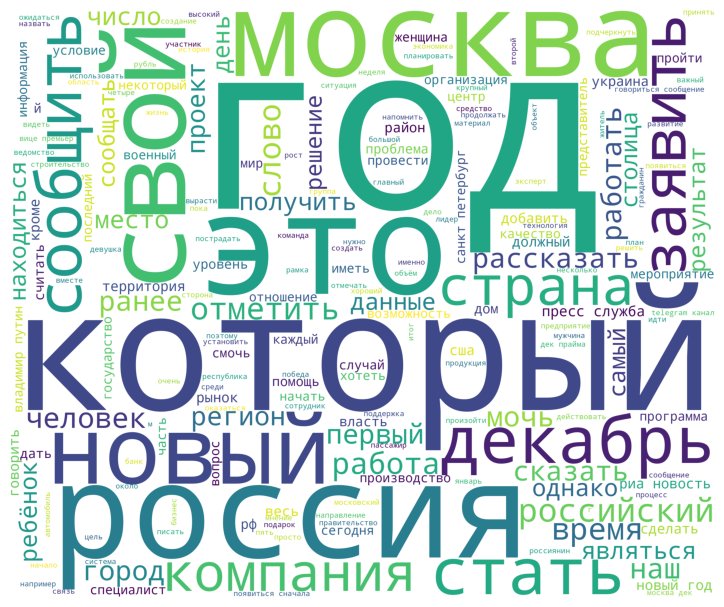

In [9]:
procWordCloud = get_wordCloud(articles[:1000])
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')

In [73]:
relevances = dbp['relevance'].to_numpy()
print(len(relevances))
relevances[0]

167371


0

In [79]:
X_train, X_test, y_train, y_test = train_test_split(articles, relevances, test_size=0.2, shuffle=False)
print(len(X_train), ' ', len(y_train))
print(len(X_test), ' ', len(y_test))
print(X_train[14])
print(y_train[14])
print(X_test[0])
print(y_test[0])

133896   133896
33475   33475
bloomberg orlen подать иск против venture global из-за срыв контракт спг: « orlen sa подать иск арбитражный суд venture global lng концерн утверждать американский экспортёр спг соблюдать условие долгосрочный контракт » сообщать bloomberg ссылка источник американский компания заявить смочь обеспечить поставка из-за проблема инвестиция ранее orlen оценить убыток компания $ 27млн ежедневно из-за запрет импорт нефть россия октябрь стать известно польский часть газопровод ямал европа передать концерн orlen арбитражный суд санкт-петербург ленинградский область постановить взыскать польско-российский компания europol gaz $ 1,5 млрд польза « газпром » нарушение запрет продолжение разбирательство суд стокгольм
1
новый приложение провайдер “ город-телеком ”: провайдер « город телек » выпустить мобильный приложение инновационный софт предоставлять наш клиент быстрый удобный способ контролировать управлять услуга получать наш компания скачивать приложение официальный 

# Моделирование

In [80]:
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', SGDClassifier(random_state=42))])
sgd_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('sgd_clf', SGDClassifier(random_state=42))])

In [83]:
predicted_sgd = sgd_ppl_clf.predict(X_test)

# Оценка

Поиск всех ошибочных

In [89]:
checkers = [1 if y_test[i] == predicted_sgd[i] else 0 for i in range(len(y_test))]
fail_indexes = []
for i, x in enumerate(checkers):
  if x == 0:
    fail_indexes.append(i)

print(fail_indexes)
print(len(fail_indexes))

[22, 34, 78, 114, 123, 139, 140, 154, 165, 169, 176, 178, 180, 187, 198, 217, 225, 226, 233, 236, 243, 248, 251, 261, 276, 354, 359, 369, 370, 371, 381, 387, 388, 391, 392, 409, 411, 414, 415, 417, 420, 423, 430, 436, 440, 441, 444, 448, 449, 450, 457, 459, 461, 468, 477, 478, 480, 485, 491, 494, 502, 507, 508, 512, 514, 535, 538, 544, 545, 556, 563, 570, 581, 582, 604, 610, 618, 621, 658, 659, 666, 668, 676, 718, 721, 725, 731, 733, 739, 760, 773, 783, 816, 825, 828, 852, 877, 891, 903, 911, 927, 928, 931, 932, 944, 960, 970, 974, 978, 1022, 1027, 1063, 1065, 1068, 1073, 1077, 1078, 1086, 1095, 1097, 1127, 1139, 1147, 1190, 1191, 1217, 1229, 1231, 1249, 1275, 1289, 1299, 1312, 1315, 1319, 1321, 1322, 1362, 1365, 1373, 1375, 1384, 1405, 1414, 1423, 1443, 1449, 1467, 1470, 1489, 1496, 1505, 1513, 1519, 1520, 1527, 1541, 1560, 1563, 1567, 1586, 1592, 1603, 1610, 1656, 1663, 1668, 1675, 1678, 1693, 1702, 1744, 1745, 1756, 1790, 1792, 1803, 1805, 1809, 1812, 1829, 1842, 1870, 1877, 1880, 1

In [94]:
for i, x in enumerate(fail_indexes[:5]):
  print(x, '\t', y_test[x], '\t', predicted_sgd[x], '\t', X_test[x])

22 	 1 	 0 	 скончаться соавтор акт провозглашение независимость украина леонтий сандуляк: 87-м год жизнь скончаться соавтор акт провозглашение государственный независимость украина леонтий сандуляк сообщить страница социальный сеть черновицкий облсовет 87-м год жизнь умереть леонтий иванович сандуляк первый чрезвычайный полномочный посол украина румыния соавтор акт провозглашение государственный независимость украина почётный гражданин город черновцы сказать сообщение сандуляк родиться 1937 год черновицкий область украина протяжение жизнь заниматься профессорский научно-общественный деятельность являться соавтор акт провозглашение независимость украина ранее петербург умереть ветеран великий отечественный война фёдор левский который оставить подпись стена рейхстаг 99 год
34 	 1 	 0 	 огурец томат 2023 год дорожать быстрый темп: данные росстат период 19 25 декабрь 2023 год плодоовощной продукция среднее подорожать 3 % это стоимость огурец вырасти 8,8 % томат 4 % сравнение декабрь 2022-

Поиск false positive ошибочных

In [95]:
checkers_fp = [1 if y_test[i] == 0 and predicted_sgd[i] == 1 else 0 for i in range(len(y_test))]
fp_indexes = []
for i, x in enumerate(checkers_fp):
  if x == 1:
    fp_indexes.append(i)

print(fp_indexes)
print(len(fp_indexes))

[236, 417, 459, 461, 563, 676, 1095, 1191, 1231, 1319, 1321, 1322, 1443, 1527, 1586, 1603, 1790, 2230, 2548, 2584, 2862, 3013, 3259, 3333, 3539, 3702, 3777, 4260, 4504, 4612, 4658, 5160, 5264, 5373, 5374, 5380, 5545, 5780, 6254, 6258, 6634, 6745, 6917, 7044, 7123, 7437, 7440, 7462, 7466, 7480, 7685, 7722, 7970, 8021, 8289, 8291, 10125, 10163, 10266, 10434, 10936, 10955, 11054, 11331, 11351, 11389, 11393, 11616, 11858, 11901, 12002, 12015, 12079, 12093, 12160, 12212, 12394, 12635, 12804, 12848, 12978, 13074, 13236, 13434, 13437, 13643, 13861, 13878, 13915, 14027, 14135, 14229, 14558, 14736, 14766, 14778, 14947, 15222, 15440, 15442, 15543, 15675, 15690, 15828, 15913, 16100, 16175, 16404, 16405, 16478, 16694, 16756, 17192, 17387, 17555, 17563, 17584, 17603, 17656, 17864, 18451, 18682, 18694, 18698, 18893, 19099, 19170, 19195, 19331, 19389, 19415, 19554, 19663, 19813, 19831, 20051, 20082, 20085, 20088, 20172, 20349, 20819, 21014, 21022, 21025, 21026, 21123, 21229, 21507, 21556, 21845, 2196

In [97]:
print(fp_indexes[0], '\t', y_test[fp_indexes[0]], '\t', predicted_sgd[fp_indexes[0]], '\t', X_test[fp_indexes[0]])

236 	 0 	 1 	 российский газ сжижиться реальность: российский спг-завод 2023 год произвести 32,33 млн тонна спг это лишь 2 % ниже год ранее снижение связать летний ремонтный кампания линия сжижение « ямал спг » « сахалина-2 » который отчасти компенсировать запуск новый среднетоннажный спг-проект балтика декабрь экспорт спг достигать 3,2 млн тонна это самый высокий уровень 2023 год экспорт европа итог год превысить показатель 2022 год достигнуть 16,42 млн тонна аналитик ждать сокращение поставка 2024 год объём производство российский спг-завод 2023 год составить 32,33 млн тонна лишь немногое уступать показатель 2022 год 33 млн тонна спг следовать данные kpler общий производство спг рф декабрь стать самый высокий история достигнуть 3,2 млн тонна 7 % выше декабрь 2022 год экспорт российский спг европа декабрь достигнуть 1,76 млн тонна повторить пиковый исторический значение ноябрь декабрь увеличиться экспорт спг япония проект « сахалин-2 » « газпром » япония октябре—декабра оценка виктор 

Поиск false negative ошибочных

In [96]:
checkers_fn = [1 if y_test[i] == 1 and predicted_sgd[i] == 0 else 0 for i in range(len(y_test))]
fn_indexes = []
for i, x in enumerate(checkers_fn):
  if x == 1:
    fn_indexes.append(i)

print(fn_indexes)
print(len(fn_indexes))

[22, 34, 78, 114, 123, 139, 140, 154, 165, 169, 176, 178, 180, 187, 198, 217, 225, 226, 233, 243, 248, 251, 261, 276, 354, 359, 369, 370, 371, 381, 387, 388, 391, 392, 409, 411, 414, 415, 420, 423, 430, 436, 440, 441, 444, 448, 449, 450, 457, 468, 477, 478, 480, 485, 491, 494, 502, 507, 508, 512, 514, 535, 538, 544, 545, 556, 570, 581, 582, 604, 610, 618, 621, 658, 659, 666, 668, 718, 721, 725, 731, 733, 739, 760, 773, 783, 816, 825, 828, 852, 877, 891, 903, 911, 927, 928, 931, 932, 944, 960, 970, 974, 978, 1022, 1027, 1063, 1065, 1068, 1073, 1077, 1078, 1086, 1097, 1127, 1139, 1147, 1190, 1217, 1229, 1249, 1275, 1289, 1299, 1312, 1315, 1362, 1365, 1373, 1375, 1384, 1405, 1414, 1423, 1449, 1467, 1470, 1489, 1496, 1505, 1513, 1519, 1520, 1541, 1560, 1563, 1567, 1592, 1610, 1656, 1663, 1668, 1675, 1678, 1693, 1702, 1744, 1745, 1756, 1792, 1803, 1805, 1809, 1812, 1829, 1842, 1870, 1877, 1880, 1885, 1887, 1896, 1897, 1899, 1908, 1913, 1914, 1923, 1924, 1927, 1941, 1945, 1949, 1963, 1964, 1

In [101]:
print(metrics.classification_report(predicted_sgd, y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93     29918
           1       0.46      0.94      0.62      3557

    accuracy                           0.88     33475
   macro avg       0.73      0.90      0.77     33475
weighted avg       0.94      0.88      0.89     33475



Сколько модель предсказала нулей и единиц и сколько было по факту соответственно

In [103]:
counts_predicted = Counter(predicted_sgd)
print(counts_predicted[0])
print(counts_predicted[1])
counts_test = Counter(y_test)
print(counts_test[0])
print(counts_test[1])

29918
3557
26259
7216
